# California house price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

Data Preparation

In [2]:
filename = "1553768847-housing.csv"
housing_df = pd.read_csv(filename)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Data Process

In [4]:
# shuffle the data
housing_df = housing_df.sample(n = len(housing_df),random_state=1)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4712,-118.36,34.06,39,2810,670.0,1109,624,3.2500,<1H OCEAN,355000
2151,-119.78,36.78,37,2185,455.0,1143,438,1.9784,INLAND,70700
15927,-122.42,37.73,46,1819,411.0,1534,406,4.0132,NEAR BAY,229400
82,-122.28,37.81,52,340,97.0,200,87,1.5208,NEAR BAY,112500
8161,-118.13,33.82,37,1530,290.0,711,283,5.1795,<1H OCEAN,225400


In [5]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
# fill null values wiht the mean of the respective column
housing_df["total_bedrooms"].fillna(housing_df["total_bedrooms"].mean(),inplace=True)

In [7]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# convert categorical data to numerical (one hot encoded)
pd.get_dummies(housing_df['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [10]:
housing_df.drop("ocean_proximity",axis = 1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39,2810,670.0,1109,624,3.2500,355000
2151,-119.78,36.78,37,2185,455.0,1143,438,1.9784,70700
15927,-122.42,37.73,46,1819,411.0,1534,406,4.0132,229400
82,-122.28,37.81,52,340,97.0,200,87,1.5208,112500
8161,-118.13,33.82,37,1530,290.0,711,283,5.1795,225400


In [11]:
housing_df = pd.concat([housing_df.drop("ocean_proximity",axis = 1),pd.get_dummies(housing_df['ocean_proximity'])],axis = 1)
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39,2810,670.0,1109,624,3.2500,355000,1,0,0,0,0
2151,-119.78,36.78,37,2185,455.0,1143,438,1.9784,70700,0,1,0,0,0
15927,-122.42,37.73,46,1819,411.0,1534,406,4.0132,229400,0,0,0,1,0
82,-122.28,37.81,52,340,97.0,200,87,1.5208,112500,0,0,0,1,0
8161,-118.13,33.82,37,1530,290.0,711,283,5.1795,225400,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17,1768,474.0,1079,436,1.7823,205300,1,0,0,0,0
17289,-119.63,34.42,42,1765,263.0,753,260,8.5608,500001,1,0,0,0,0
5192,-118.26,33.93,42,1433,295.0,775,293,1.1326,104800,1,0,0,0,0
12172,-117.16,33.73,10,2381,454.0,1323,477,2.6322,140700,0,1,0,0,0


In [12]:
# Rearrange the columns
housing_df = housing_df[['longitude','latitude','housing_median_age','total_rooms',
                         'total_bedrooms','population','households','median_income',
                         '<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','median_house_value']]
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 4712 to 235
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   <1H OCEAN           20640 non-null  uint8  
 9   INLAND              20640 non-null  uint8  
 10  ISLAND              20640 non-null  uint8  
 11  NEAR BAY            20640 non-null  uint8  
 12  NEAR OCEAN          20640 non-null  uint8  
 13  median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), uint8(5)
memory usage: 1.7 MB


Data Visualization

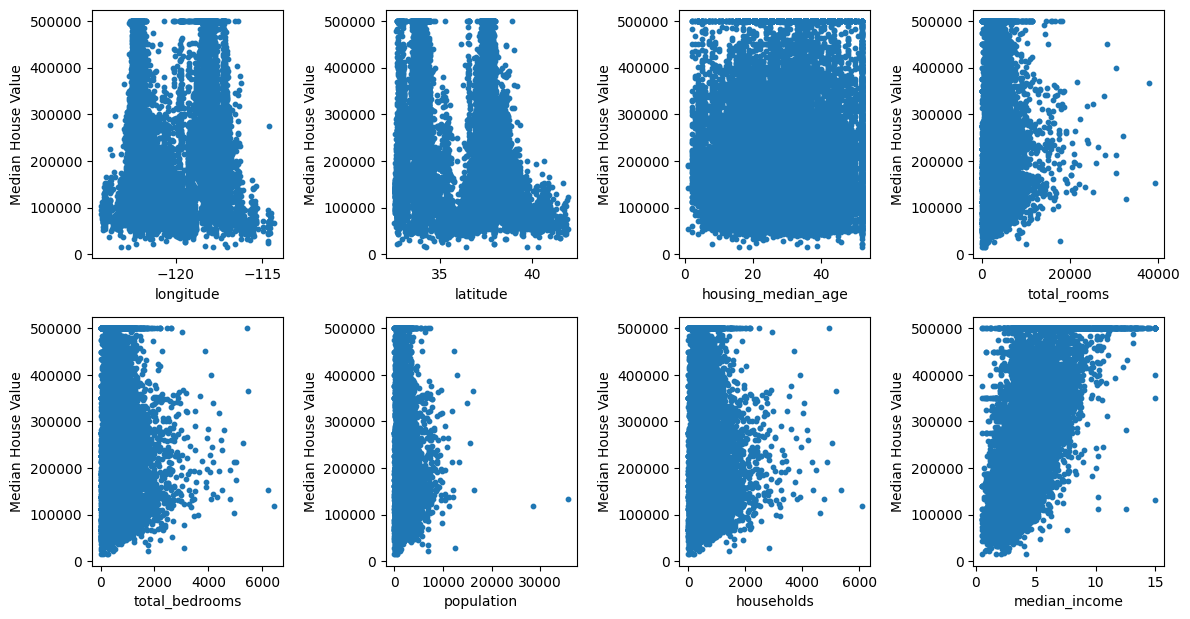

In [13]:
# Extract numerical features
numerical_features = ['longitude','latitude','housing_median_age','total_rooms',
                         'total_bedrooms','population','households','median_income']
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))  # Adjust figsize as needed

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Scatter plots for each numerical feature
for i, feature in enumerate(numerical_features):
    axes[i].scatter(housing_df[feature], housing_df['median_house_value'], s=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Median House Value')

# Remove any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Modeling

Split the data

In [14]:
train,test,validation = housing_df[:18000],housing_df[18000:19215],housing_df[19215:]
len(train),len(test),len(validation)

(18000, 1215, 1425)

In [15]:
x_train , y_train = train.to_numpy()[:,:-1],train.to_numpy()[:,-1]
x_valid , y_valid = validation.to_numpy()[:,:-1],validation.to_numpy()[:,-1]
x_test , y_test = test.to_numpy()[:,:-1],test.to_numpy()[:,-1]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape,x_test.shape, y_test.shape

((18000, 13), (18000,), (1425, 13), (1425,), (1215, 13), (1215,))

In [16]:
scaler = StandardScaler().fit(x_train[:, :8])
def preprocessor(data):
  A = np.copy(data)
  A[:, :8] = scaler.transform(A[:,:8])
  return A

x_train,x_valid,x_test = preprocessor(x_train), preprocessor(x_valid), preprocessor(x_test)

In [17]:
model = LinearRegression().fit(x_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)
y_test_pred = model.predict(x_test)

# Calculate the Root Mean Squared Error (RMSE) for training, validation, and test sets
rmse_train = np.sqrt(mse(y_train, y_train_pred))
rmse_valid = np.sqrt(mse(y_valid, y_valid_pred))
rmse_test = np.sqrt(mse(y_test, y_test_pred))

# Calculate the R-squared (R2) score for the model on the validation set
r2 = r2_score(y_valid, y_valid_pred)

# Print RMSE and R2 scores along with some explanatory text
print(f"Root Mean Squared Error (RMSE) - Training: {rmse_train:.4f}")
print(f"Root Mean Squared Error (RMSE) - Validation: {rmse_valid:.4f}")
print(f"Root Mean Squared Error (RMSE) - Test: {rmse_test:.4f}")
print(f"R-squared (R2) Score - Validation: {r2:.4f}")

Root Mean Squared Error (RMSE) - Training: 68490.9544
Root Mean Squared Error (RMSE) - Validation: 70082.8976
Root Mean Squared Error (RMSE) - Test: 70358.9623
R-squared (R2) Score - Validation: 0.6379


In [18]:
y_test = y_test.astype('float64')

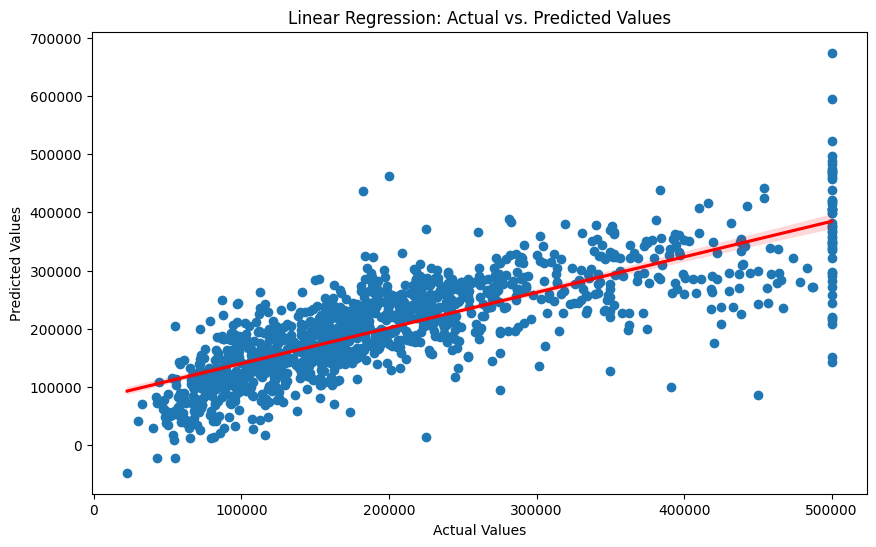

In [19]:

y_pred = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted Values")

# Add a regression line (optional)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

# Show the plot
plt.show()

In [20]:
model_2 = GradientBoostingRegressor(n_estimators=250).fit(x_train, y_train)

# Make predictions on the training and validation sets
y_train_pred = model_2.predict(x_train)
y_valid_pred = model_2.predict(x_valid)

# Calculate the Root Mean Squared Error (RMSE) for training and validation sets
rmse_train = np.sqrt(mse(y_train, y_train_pred))
rmse_valid = np.sqrt(mse(y_valid, y_valid_pred))
rmse_test = np.sqrt(mse(y_test, y_test_pred))

# Calculate the R-squared (R2) score for the model
r2 = r2_score(y_valid, y_valid_pred)

# Print RMSE and R2 scores along with some explanatory text
print(f"Root Mean Squared Error (RMSE) - Training: {rmse_train:.4f}")
print(f"Root Mean Squared Error (RMSE) - Validation: {rmse_valid:.4f}")
print(f"Root Mean Squared Error (RMSE) - Test: {rmse_test:.4f}")
print(f"R-squared (R2) Score - Validation: {r2:.4f}")

Root Mean Squared Error (RMSE) - Training: 46765.8283
Root Mean Squared Error (RMSE) - Validation: 50580.2912
Root Mean Squared Error (RMSE) - Test: 70358.9623
R-squared (R2) Score - Validation: 0.8114


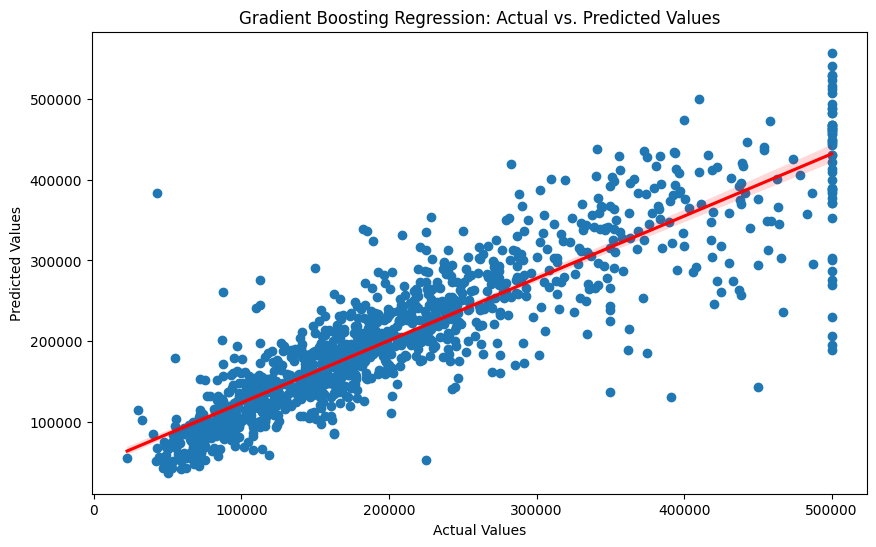

In [21]:

y_pred = model_2.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regression: Actual vs. Predicted Values")

# Add a regression line (optional)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

# Show the plot
plt.show()